# Numeric verification of $\mathcal{I}_{\text{max}}$ in physical systems

This notebook analyzes $\mathcal{I}_{\text{max}}$ applied in different physical systems across scales to validate claims made in the paper. The goal is to quickly sanity check the formulas with numeric experiments and visual aids.

**NOTE:** The formulas may have mistakes - please file an issue if you find any. My intent is to help the community quickly validate or disprove the results so rapid progress can be made.

## Quantum Mechanics

Quantum Mechanics
Information flow in quantum systems arises from the interplay between state space size (\( n \)) and the energy driving state evolution. The entropy $ S $ of a quantum system scales with the logarithm of the number of accessible microstates:

$S \propto k_B \ln(n)$

where $ k_B $ is Boltzmann’s constant, and $ n $ is the number of accessible microstates. Accessible microstates represent the distinguishable quantum configurations available to the system, reflecting its state space size. The logarithmic scaling arises naturally from statistical mechanics, where entropy measures the number of ways the system can be arranged.

The Margolus-Levitin theorem relates the rate of state evolution to the system’s average energy above its ground state:

$ \frac{\Delta S}{\Delta t} \propto \frac{k_B E}{\hbar}$

where $E$ is the system’s average energy, and $\hbar$ is Planck’s constant.

Combining these gives the information flow:

$\mathcal{I}_{\text{max}}^{\text{Quantum}} = S \cdot \frac{\Delta S}{\Delta t} \propto \frac{k_B^2 \ln(n) E}{\hbar}$

The units of $\mathcal{I}_{\text{max}}^{\text{Quantum}}$ are:

$\left[\mathcal{I}_{\text{max}}^{\text{Quantum}}\right] = \frac{\left(\text{J}/\text{K}\right)^2}{\text{s}}$


consistent with information flow. This result highlights the role of both the logarithmic complexity of the state space $\ln(n)$ and the dynamic energy $E$ in governing quantum information flow. This is analogous to von Neumann entropy, which generalizes these ideas for quantum density matrices, emphasizing the foundational link between quantum information and thermodynamic principles.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k_B = 1.380649e-23  # Boltzmann constant in J/K
hbar = 1.0545718e-34  # Reduced Planck constant in J·s

# Define state space size (n) and energy (E)
n_values = np.logspace(1, 10, 100)  # Range of state space sizes (logarithmic scale)
E_values = np.linspace(1e-21, 1e-18, 100)  # Range of energy values in joules

# Compute entropy (S) and rate of entropy change (ΔS/Δt)
def entropy(n):
    return k_B * np.log(n)  # S = k_B * ln(n)

def entropy_rate(E):
    return (k_B * E) / hbar  # ΔS/Δt = k_B * E / hbar

# Compute information flow (I_max)
def information_flow(n, E):
    S = entropy(n)
    dS_dt = entropy_rate(E)
    return S * dS_dt  # I_max = S * ΔS/Δt


### 3D Surface Analysis
The surface plot demonstrates the joint scaling with both n and E. It shows:
- Linear scaling with energy (E)
- Logarithmic scaling with state space size (n)
- Smooth, well-behaved surface indicating consistent scaling

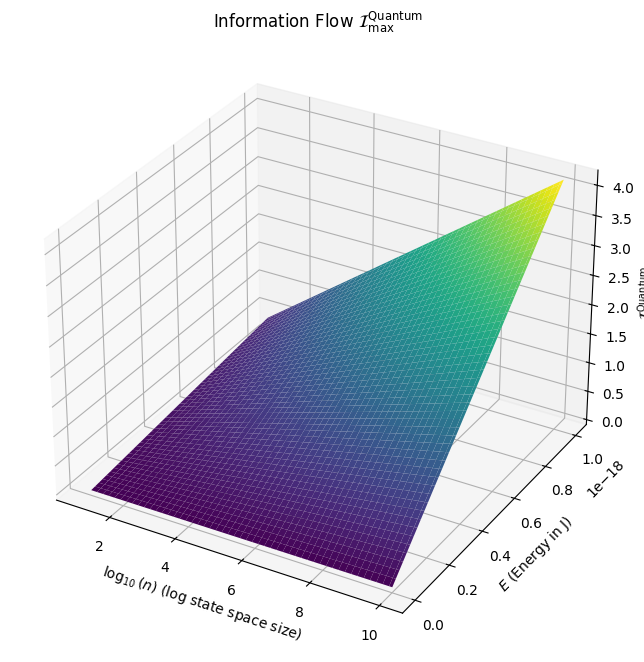

In [6]:
# Meshgrid for 2D visualization
N, E = np.meshgrid(n_values, E_values)
I_max = information_flow(N, E)

# Plotting Information Flow vs n and E
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(N), E, I_max, cmap='viridis', edgecolor='none')
ax.set_title(r"Information Flow $\mathcal{I}_{\text{max}}^{\text{Quantum}}$")
ax.set_xlabel(r"$\log_{10}(n)$ (log state space size)")
ax.set_ylabel(r"$E$ (Energy in J)")
ax.set_zlabel(r"$\mathcal{I}_{\text{max}}^{\text{Quantum}}$")
plt.show()


### Log-Log Analysis
The log-log plot shows the fundamental structure:
- Parallel lines show multiplicative E scaling
- Curves shifted by log(E)
- Shape follows log(ln(n)), validating state space scaling

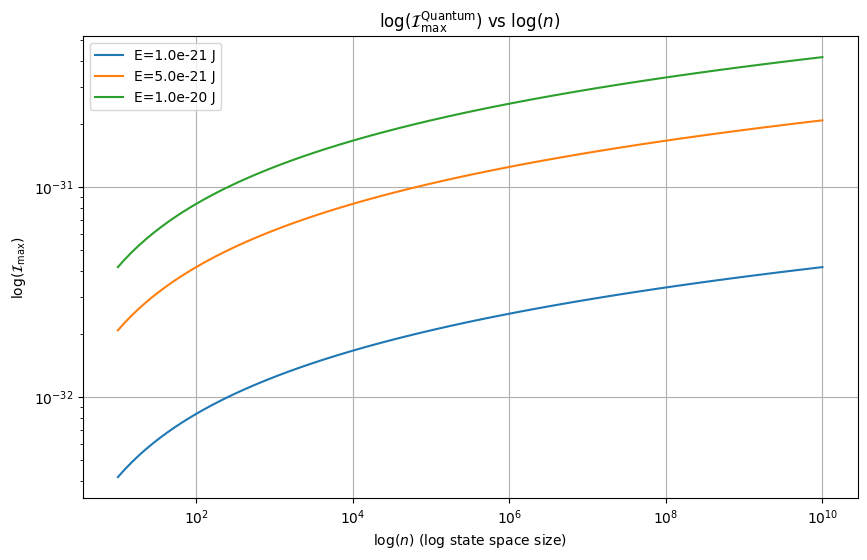

In [2]:
plt.figure(figsize=(10, 6))
for energy in [1e-21, 5e-21, 1e-20]:
    plt.loglog(n_values, information_flow(n_values, energy), 
               label=f"E={energy:.1e} J")
plt.title(r"$\log(\mathcal{I}_{\text{max}}^{\text{Quantum}})$ vs $\log(n)$")
plt.xlabel(r"$\log(n)$ (log state space size)")
plt.ylabel(r"$\log(\mathcal{I}_{\text{max}})$")
plt.legend()
plt.grid(True)
plt.show()

## Cosmology

The observable universe encodes information on its horizon, with entropy scaling according to the horizon area. This scaling is consistent with the holographic principle, which suggests that information about a volume of spacetime is encoded on its boundary. Using the Bekenstein-Hawking-like formula for cosmological horizons, the entropy is:

$S_{\text{Cosmo}} = \frac{k_B \pi c^2}{4 l_p^2 \Lambda}$

where $l_p = \sqrt{\frac{\hbar G}{c^3}} $ is the Planck length, and $\Lambda$ is the cosmological constant, corresponding to the energy density of the vacuum that drives the universe’s accelerated expansion.

The rate of entropy change is determined by the Hubble expansion. As the universe expands, the horizon grows, increasing the number of accessible microstates. This rate is tied to the Hubble parameter, $ H = \sqrt{\frac{\Lambda c^2}{3}} $:

$\frac{\Delta S_{\text{Cosmo}}}{\Delta t} = \frac{k_B c}{l_p} \sqrt{\frac{\Lambda c^2}{3}}$

Combining these expressions, the information flow for the cosmological horizon is:

$\mathcal{I}_{\text{max}}^{\text{Cosmo}} = S_{\text{Cosmo}} \cdot \frac{\Delta S_{\text{Cosmo}}}{\Delta t} \propto \frac{k_B^2 \pi c^{13/2}}{4 \sqrt{3} \hbar^{3/2} G^{3/2} \Lambda^{1/2}}$

with units:

$\left[\mathcal{I}_{\text{max}}^{\text{Cosmo}}\right] = \frac{\left(\text{J}/\text{K}\right)^2}{\text{s}}$


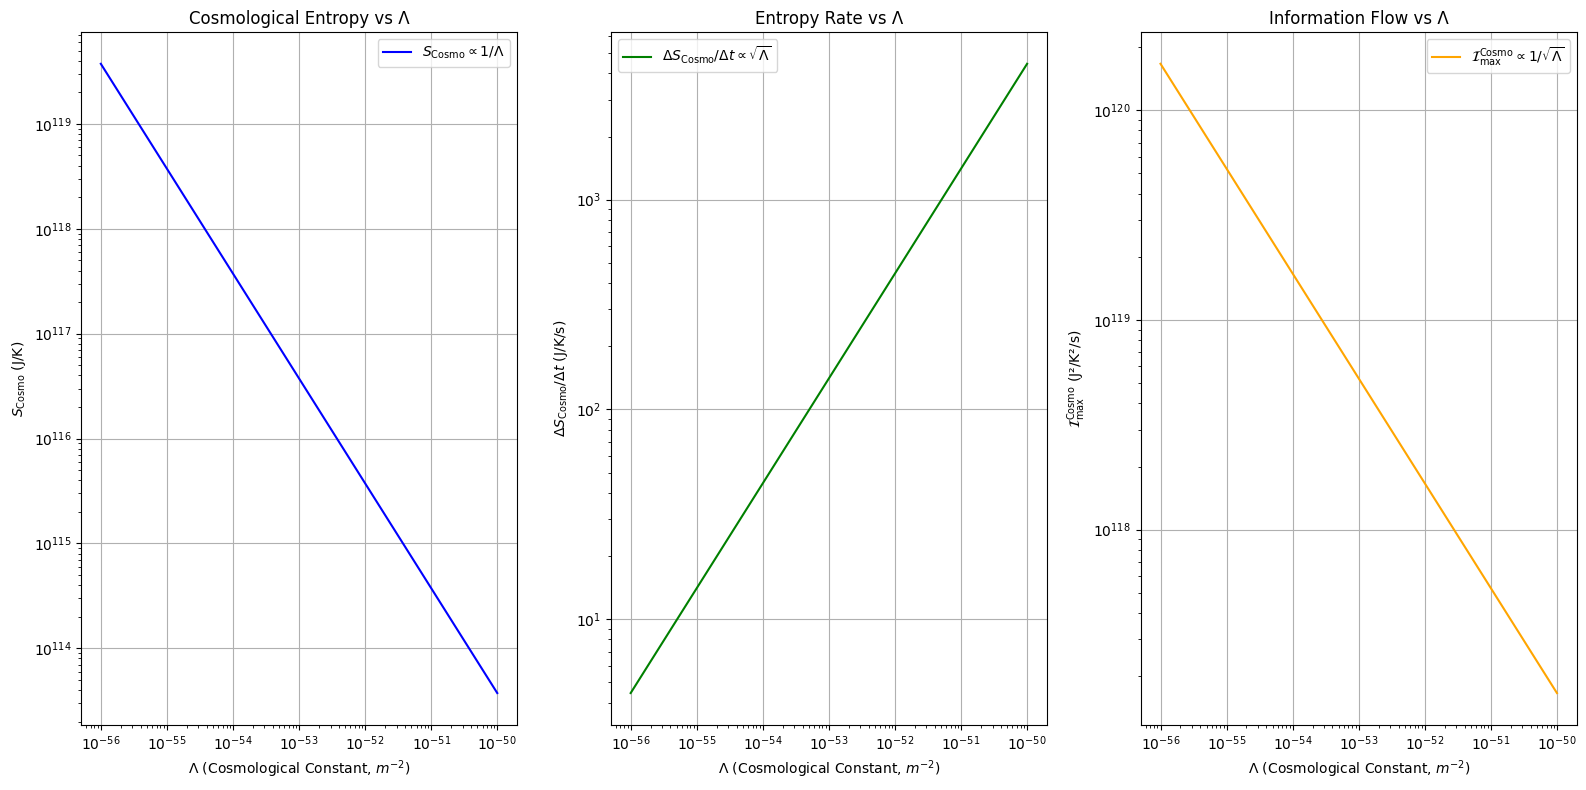

Lambda: 1.0e-56, S_Cosmo: 3.744e+119, dS_Cosmo/dt: 4.443e+00, I_max: 1.663e+120
Lambda: 1.0e-54, S_Cosmo: 3.744e+117, dS_Cosmo/dt: 4.443e+01, I_max: 1.663e+119
Lambda: 1.0e-52, S_Cosmo: 3.744e+115, dS_Cosmo/dt: 4.443e+02, I_max: 1.663e+118


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k_B = 1.380649e-23  # Boltzmann constant in J/K
hbar = 1.0545718e-34  # Reduced Planck constant in J·s
c = 3.0e8  # Speed of light in m/s
G = 6.67430e-11  # Gravitational constant in m^3/kg/s^2
pi = np.pi

# Planck length
l_p = np.sqrt(hbar * G / c**3)  # Planck length in meters

# Define a range of cosmological constants (Λ) for testing
Lambda_values = np.logspace(-56, -50, 100)  # Λ in m^-2

# Compute cosmological entropy (S_Cosmo)
def cosmological_entropy(Lambda):
    return (k_B * pi * c**2) / (4 * l_p**2 * Lambda)

# Compute entropy rate (ΔS/Δt)
def entropy_rate(Lambda):
    H = np.sqrt(Lambda * c**2 / 3)  # Hubble parameter H
    return (k_B * c / l_p) * np.sqrt(Lambda * c**2 / 3)

# Compute information flow (I_max_Cosmo)
def information_flow(Lambda):
    S_Cosmo = cosmological_entropy(Lambda)
    dS_dt = entropy_rate(Lambda)
    return S_Cosmo * dS_dt

# Calculate values
Lambda_vals = Lambda_values
S_vals = cosmological_entropy(Lambda_vals)
dS_dt_vals = entropy_rate(Lambda_vals)
I_max_vals = information_flow(Lambda_vals)

# Plot results
plt.figure(figsize=(16, 8))

# Cosmological Entropy vs Λ
plt.subplot(1, 3, 1)
plt.plot(Lambda_vals, S_vals, label=r"$S_{\text{Cosmo}} \propto 1/\Lambda$", color='blue')
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\Lambda$ (Cosmological Constant, $m^{-2}$)")
plt.ylabel(r"$S_{\text{Cosmo}}$ (J/K)")
plt.title("Cosmological Entropy vs Λ")
plt.grid()
plt.legend()

# Entropy Rate vs Λ
plt.subplot(1, 3, 2)
plt.plot(Lambda_vals, dS_dt_vals, label=r"$\Delta S_{\text{Cosmo}}/\Delta t \propto \sqrt{\Lambda}$", color='green')
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\Lambda$ (Cosmological Constant, $m^{-2}$)")
plt.ylabel(r"$\Delta S_{\text{Cosmo}}/\Delta t$ (J/K/s)")
plt.title("Entropy Rate vs Λ")
plt.grid()
plt.legend()

# Information Flow vs Λ
plt.subplot(1, 3, 3)
plt.plot(Lambda_vals, I_max_vals, label=r"$\mathcal{I}_{\text{max}}^{\text{Cosmo}} \propto 1/\sqrt{\Lambda}$", color='orange')
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\Lambda$ (Cosmological Constant, $m^{-2}$)")
plt.ylabel(r"$\mathcal{I}_{\text{max}}^{\text{Cosmo}}$ (J²/K²/s)")
plt.title("Information Flow vs Λ")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Print sample values for verification
for Lambda in [1e-56, 1e-54, 1e-52]:
    S = cosmological_entropy(Lambda)
    dS_dt = entropy_rate(Lambda)
    I_max = information_flow(Lambda)
    print(f"Lambda: {Lambda:.1e}, S_Cosmo: {S:.3e}, dS_Cosmo/dt: {dS_dt:.3e}, I_max: {I_max:.3e}")



## Black holes

Black holes represent the maximal information density in spacetime, encoding entropy on their event horizons via the Bekenstein-Hawking formula:

$S_{\text{BH}} = \frac{k_B A}{4l_p^2} = \frac{k_B \pi R_s^2}{l_p^2} \propto k_B M^2$

where $A = 4\pi R_s^2$ is the horizon area, $R_s = \frac{2GM}{c^2}$ is the Schwarzschild radius, and $l_p = \sqrt{\frac{\hbar G}{c^3}}$ is the Planck length. The quadratic scaling of $S_{\text{BH}}$ with mass reflects the fundamental relationship between area and entropy, as suggested by the holographic principle.

Hawking radiation, arising from quantum effects near the event horizon, governs the rate of entropy change. The temperature of a black hole is:

$T_H = \frac{\hbar c^3}{8\pi G k_B M}$

The corresponding entropy emission rate, derived from the radiation power, is:

$\frac{\Delta S_{\text{BH}}}{\Delta t} \propto \frac{\hbar}{M^2}$

Combining these, the information flow is:

$\mathcal{I}_{\text{max}}^{\text{BH}} = S_{\text{BH}} \cdot \frac{\Delta S_{\text{BH}}}{\Delta t} \propto \hbar$

with units:

$\left[\mathcal{I}_{\text{max}}^{\text{BH}}\right] = \frac{\left(\text{J}/\text{K}\right)^2}{\text{s}}$


This result highlights a profound property of black holes: they maintain a constant information flow, independent of their mass. Larger black holes store more entropy but radiate it more slowly, while smaller black holes radiate more efficiently but store less entropy.

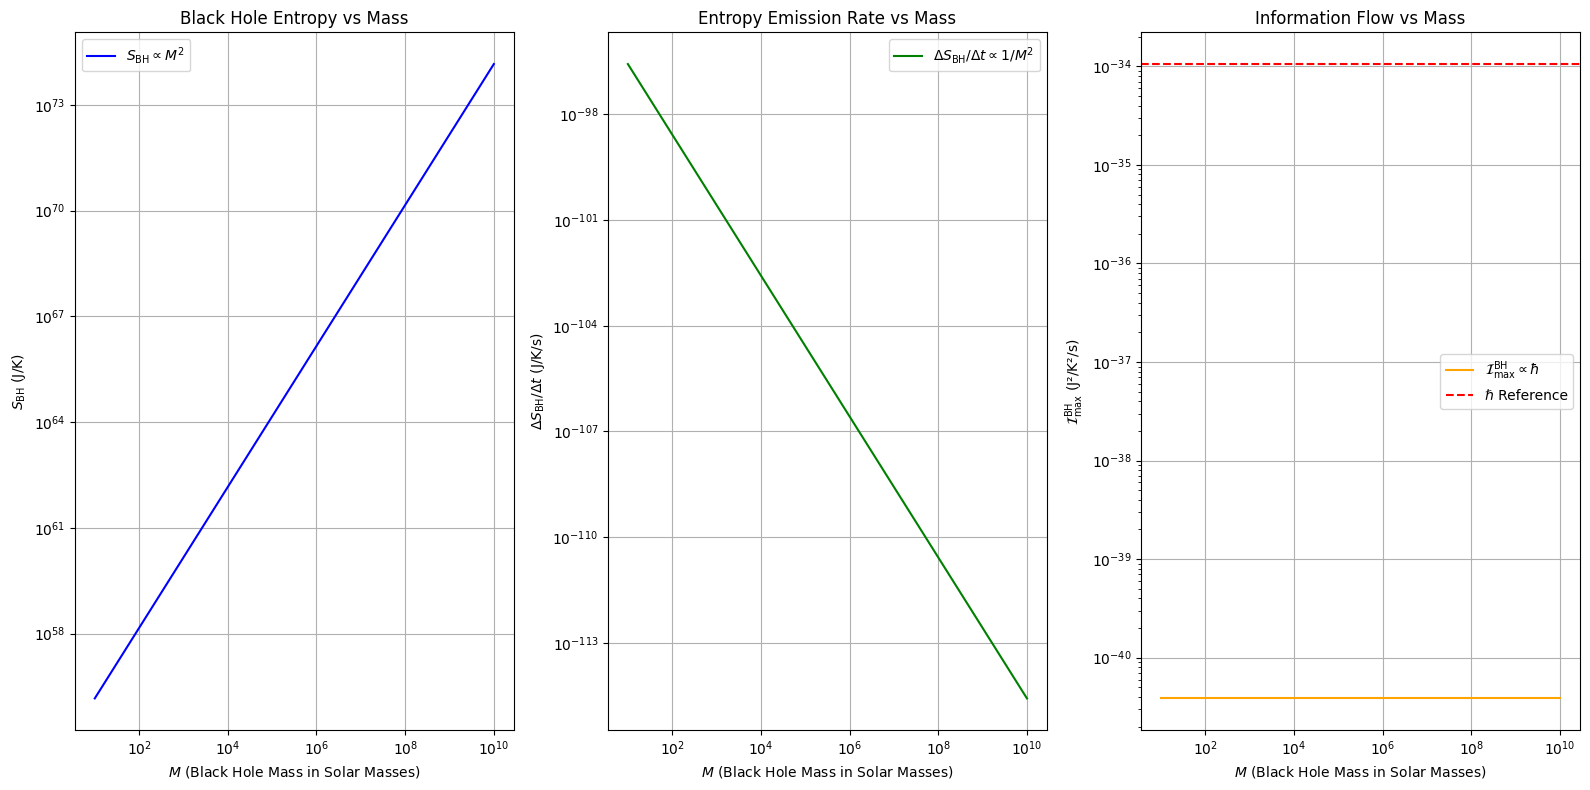

M: 10 M_solar, S_BH: 1.447e+56, dS_BH/dt: 2.667e-97, I_max: 3.860e-41
M: 100 M_solar, S_BH: 1.447e+58, dS_BH/dt: 2.667e-99, I_max: 3.860e-41
M: 1000 M_solar, S_BH: 1.447e+60, dS_BH/dt: 2.667e-101, I_max: 3.860e-41


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k_B = 1.380649e-23  # Boltzmann constant in J/K
hbar = 1.0545718e-34  # Reduced Planck constant in J·s
c = 3.0e8  # Speed of light in m/s
G = 6.67430e-11  # Gravitational constant in m^3/kg/s^2
pi = np.pi

# Planck length
l_p = np.sqrt(hbar * G / c**3)  # Planck length in meters

# Define a range of black hole masses (in solar masses)
M_solar = 1.98847e30  # Mass of the Sun in kg
M_values = np.logspace(1, 10, 100) * M_solar  # Black hole masses in kg

# Compute black hole entropy (S_BH)
def black_hole_entropy(M):
    return k_B * pi * (2 * G * M / c**2)**2 / l_p**2  # S_BH ∝ k_B M^2

# Compute entropy emission rate (ΔS_BH/Δt)
def entropy_emission_rate(M):
    return hbar / M**2  # ΔS/Δt ∝ ℏ / M^2

# Compute information flow (I_max_BH)
def information_flow(M):
    S_BH = black_hole_entropy(M)
    dS_dt = entropy_emission_rate(M)
    return S_BH * dS_dt  # I_max = S_BH * ΔS/Δt

# Calculate values
S_BH_vals = black_hole_entropy(M_values)
dS_dt_vals = entropy_emission_rate(M_values)
I_max_vals = information_flow(M_values)

# Plot results
plt.figure(figsize=(16, 8))

# Black Hole Entropy vs Mass
plt.subplot(1, 3, 1)
plt.plot(M_values / M_solar, S_BH_vals, label=r"$S_{\text{BH}} \propto M^2$", color='blue')
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$M$ (Black Hole Mass in Solar Masses)")
plt.ylabel(r"$S_{\text{BH}}$ (J/K)")
plt.title("Black Hole Entropy vs Mass")
plt.grid()
plt.legend()

# Entropy Emission Rate vs Mass
plt.subplot(1, 3, 2)
plt.plot(M_values / M_solar, dS_dt_vals, label=r"$\Delta S_{\text{BH}}/\Delta t \propto 1/M^2$", color='green')
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$M$ (Black Hole Mass in Solar Masses)")
plt.ylabel(r"$\Delta S_{\text{BH}}/\Delta t$ (J/K/s)")
plt.title("Entropy Emission Rate vs Mass")
plt.grid()
plt.legend()

# Information Flow vs Mass
plt.subplot(1, 3, 3)
plt.plot(M_values / M_solar, I_max_vals, label=r"$\mathcal{I}_{\text{max}}^{\text{BH}} \propto \hbar$", color='orange')
plt.axhline(y=hbar, color='red', linestyle='--', label=r"ℏ Reference")
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$M$ (Black Hole Mass in Solar Masses)")
plt.ylabel(r"$\mathcal{I}_{\text{max}}^{\text{BH}}$ (J²/K²/s)")
plt.title("Information Flow vs Mass")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Print sample values for verification
for M in [10, 100, 1000]:  # Black hole masses in solar masses
    M_kg = M * M_solar
    S_BH = black_hole_entropy(M_kg)
    dS_dt = entropy_emission_rate(M_kg)
    I_max = information_flow(M_kg)
    print(f"M: {M} M_solar, S_BH: {S_BH:.3e}, dS_BH/dt: {dS_dt:.3e}, I_max: {I_max:.3e}")


# General Relativity
Einstein’s field equations relate spacetime curvature $G_{\mu\nu}$ to energy-momentum $T_{\mu\nu}$, with the proportionality constant:

$\frac{8\pi G}{c^4}$

While $\frac{8\pi G}{c^4}$ has units of energy density:

$\left[\frac{8\pi G}{c^4}\right] = \frac{\text{J}}{\text{m}^3}$

a connection to information flow emerges through thermodynamic principles:


For a region of spacetime with volume \(V\), the total energy is:

$E = \rho V = \frac{\text{J}}{\text{m}^3} \cdot \text{m}^3 = \text{J}$


$S = \frac{E}{T} = \frac{\text{J}}{\text{K}}$

where $T$ is the system’s temperature.

The rate of entropy change is:

$\frac{\Delta S}{\Delta t} = \frac{\text{J}}{\text{K} \cdot \text{s}}$


Combining these gives the information flow:

$\mathcal{I} = S \cdot \frac{\Delta S}{\Delta t} = \frac{(\text{J}/\text{K})^2}{\text{s}}$


This dimensional consistency suggests a deeper relationship between energy-momentum dynamics and the principles of information flow, as encoded in Einstein’s equations. It hints that the energy-momentum tensor $T_{\mu\nu}$, while representing energy density and flux, might also implicitly govern information flow in spacetime.

The tests here are mostly exploratory. Please feel free to leave suggestions.

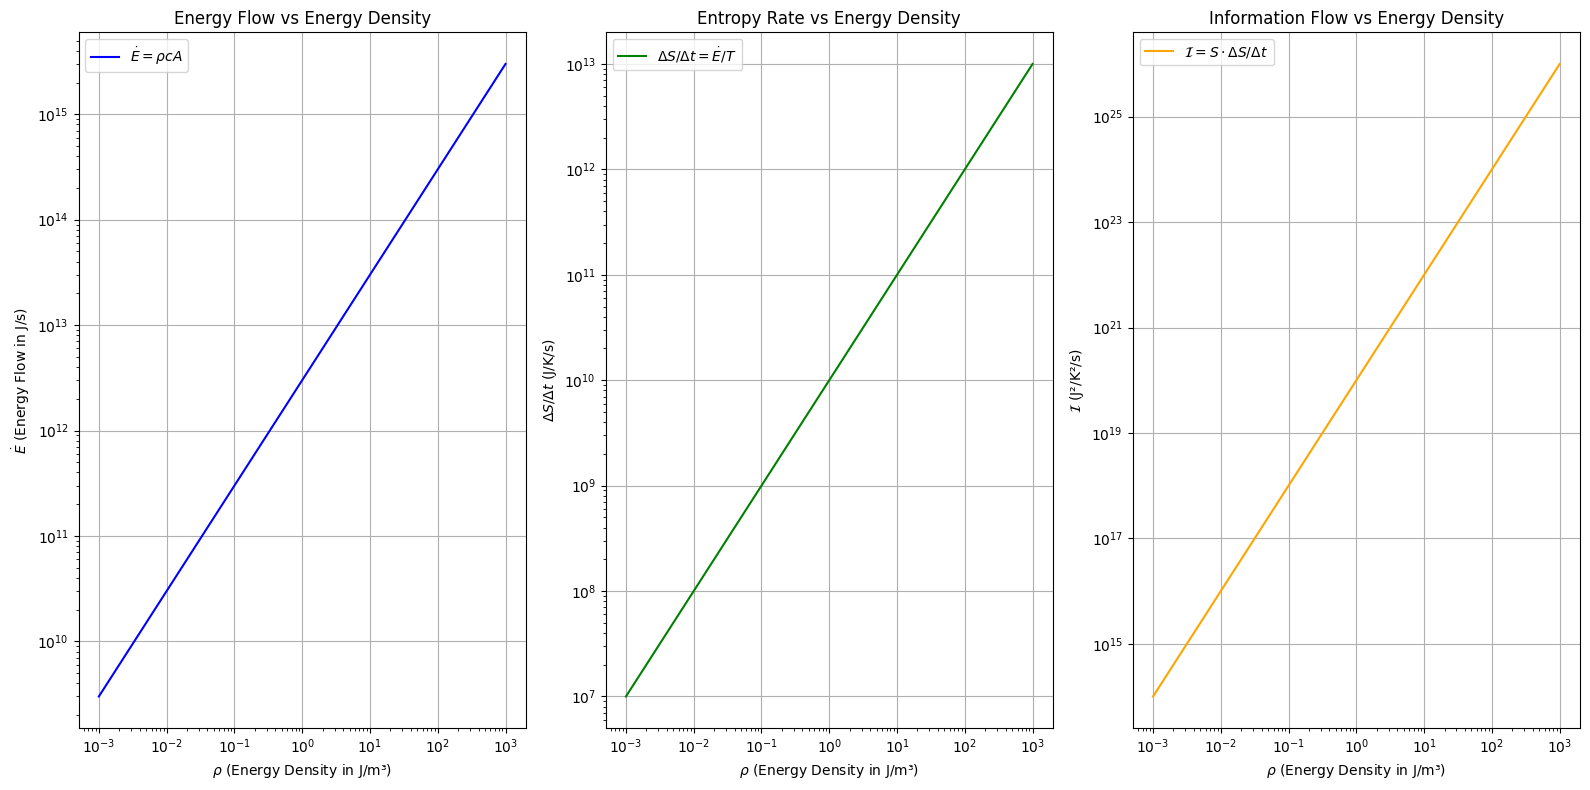

rho: 1.0e-03 J/m^3, E_flow: 3.000e+09 J/s, S: 1.000e+07 J/K, dS/dt: 1.000e+07 J/K/s, I: 1.000e+14 J²/K²/s
rho: 1.0e+00 J/m^3, E_flow: 3.000e+12 J/s, S: 1.000e+10 J/K, dS/dt: 1.000e+10 J/K/s, I: 1.000e+20 J²/K²/s
rho: 1.0e+03 J/m^3, E_flow: 3.000e+15 J/s, S: 1.000e+13 J/K, dS/dt: 1.000e+13 J/K/s, I: 1.000e+26 J²/K²/s


In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k_B = 1.380649e-23  # Boltzmann constant in J/K
c = 3.0e8  # Speed of light in m/s
G = 6.67430e-11  # Gravitational constant in m^3/kg/s^2
pi = np.pi

# Simulation parameters
A = 1.0e4  # Boundary area in m^2 (arbitrary test area)
T = 300.0  # Temperature in K (arbitrary test temperature)
rho_values = np.logspace(-3, 3, 100)  # Energy density in J/m^3

# Compute energy flow (E_flow), entropy rate (ΔS/Δt), and information flow (I)
def compute_energy_flow(rho, c, A):
    """Compute energy flow across a boundary."""
    return rho * c * A  # E_flow = ρ * c * A

def compute_entropy_rate(E_flow, T):
    """Compute entropy rate based on energy flow and temperature."""
    return E_flow / T  # ΔS/Δt = E_flow / T

def compute_information_flow(S, dS_dt):
    """Compute information flow."""
    return S * dS_dt  # I = S * ΔS/Δt

# Compute energy, entropy, and information flow
E_flow_vals = compute_energy_flow(rho_values, c, A)
S_vals = E_flow_vals / T  # S = E / T
dS_dt_vals = compute_entropy_rate(E_flow_vals, T)
I_vals = compute_information_flow(S_vals, dS_dt_vals)

# Plot results
plt.figure(figsize=(16, 8))

# Energy Flow vs Energy Density
plt.subplot(1, 3, 1)
plt.plot(rho_values, E_flow_vals, label=r"$\dot{E} = \rho c A$", color='blue')
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\rho$ (Energy Density in J/m³)")
plt.ylabel(r"$\dot{E}$ (Energy Flow in J/s)")
plt.title("Energy Flow vs Energy Density")
plt.grid()
plt.legend()

# Entropy Rate vs Energy Density
plt.subplot(1, 3, 2)
plt.plot(rho_values, dS_dt_vals, label=r"$\Delta S / \Delta t = \dot{E} / T$", color='green')
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\rho$ (Energy Density in J/m³)")
plt.ylabel(r"$\Delta S / \Delta t$ (J/K/s)")
plt.title("Entropy Rate vs Energy Density")
plt.grid()
plt.legend()

# Information Flow vs Energy Density
plt.subplot(1, 3, 3)
plt.plot(rho_values, I_vals, label=r"$\mathcal{I} = S \cdot \Delta S / \Delta t$", color='orange')
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\rho$ (Energy Density in J/m³)")
plt.ylabel(r"$\mathcal{I}$ (J²/K²/s)")
plt.title("Information Flow vs Energy Density")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Print sample values for verification
for rho in [1e-3, 1e0, 1e3]:  # Energy densities in J/m^3
    E_flow = compute_energy_flow(rho, c, A)
    S = E_flow / T
    dS_dt = compute_entropy_rate(E_flow, T)
    I = compute_information_flow(S, dS_dt)
    print(f"rho: {rho:.1e} J/m^3, E_flow: {E_flow:.3e} J/s, S: {S:.3e} J/K, dS/dt: {dS_dt:.3e} J/K/s, I: {I:.3e} J²/K²/s")
